<div align="center"style="font-size:30px;">
MÔ HÌNH HỒI QUY TUYẾN TÍNH
</div>
<div align="center"style="font-size:25px;">
Nhóm: Forever Alone
</div>

## Thư viện

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

## Chèn dữ liệu

In [2]:
df = pd.read_csv("weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Mô tả về tập dữ liệu

Tập dữ liệu weatherHistory.csv chứa thông tin lịch sử về thời tiết  xung quanh Szeged, Hungary trong khoảng thời gian từ ngày 1/1/2006 đến ngày 31/12/2016. Tập dữ liệu này được thu thập từ các trạm thời tiết trong khu vực và chứa thông tin về các chỉ số như nhiệt độ, độ ẩm, tốc độ gió, áp suất khí quyển, độ mây và cảm giác nhiệt.

Tập dữ liệu bao gồm các thuộc tính sau:

- Formatted Date: Ngày giờ dưới dạng chuỗi định dạng
- Summary: Tóm tắt về tình trạng thời tiết trong ngày
- Precip Type: Loại mưa (nếu có)
- Temperature (C): Nhiệt độ (đơn vị độ C)
- Apparent Temperature (C): Cảm giác nhiệt (đơn vị độ C)
- Humidity: Độ ẩm (đơn vị phần trăm)
- Wind Speed (km/h): Tốc độ gió (đơn vị km/h)
- Wind Bearing (degrees): Hướng gió (đơn vị độ)
- Visibility (km): Tầm nhìn (đơn vị km)
- Loud Cover: Giá trị vô nghĩa
- Pressure (millibars): Áp suất khí quyển (đơn vị millibars)
- Daily Summary: Tóm tắt về tình trạng thời tiết trong ngày

Tập dữ liệu này được sử dụng để đưa ra các dự đoán về nhiệt độ và cảm giác nhiệt dựa trên các chỉ số thời tiết khác.

## Vẽ biểu đồ thể hiện tổng quát của dữ liệu

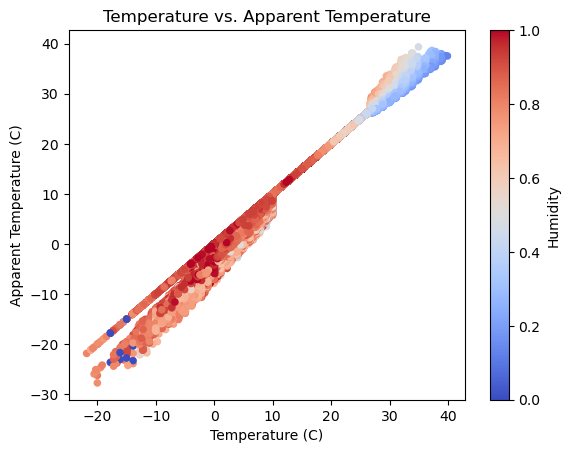

In [4]:
df.plot(kind='scatter', x='Temperature (C)', y='Apparent Temperature (C)', c='Humidity', cmap='coolwarm')

plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.title('Temperature vs. Apparent Temperature')

plt.show()

## Xử lý dữ liệu

In [5]:
# Chọn các cột đặc trưng và biến mục tiêu
X = df[['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]
y = df['Apparent Temperature (C)']

In [6]:
# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Khởi tạo mô hình và dự đoán

In [7]:
# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Dự đoán trên tập test
y_pred = model.predict(X_test)

In [9]:
# Dự đoán trên một bản ghi cụ thể của tập dữ liệu
data = [[9.47222222222222, 0.89, 14.1197, 1015.13]]
data = pd.DataFrame(data, columns=['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)'])
y_pred1 = model.predict(data)
print(y_pred1)

[7.93962239]


## Đánh giá kết quả của mô hình bằng chỉ số đánh giá

In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mean_squared_error (Độ lệch trung bình giữa giá trị dự đoán và giá trị thực tế):", mse)
print("R-squared (hệ số xác định):", r2)    

mean_squared_error (Độ lệch trung bình giữa giá trị dự đoán và giá trị thực tế): 1.1650467622619358
R-squared (hệ số xác định): 0.9899303456016987


## Vẽ biểu đồ của mô hình

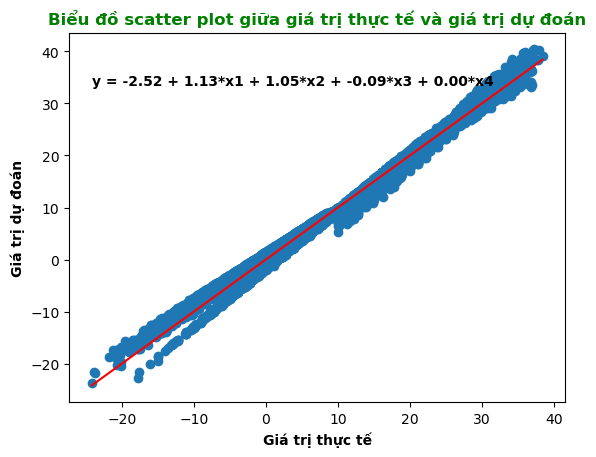

In [11]:
# Vẽ biểu đồ scatter plot giữa giá trị thực tế và giá trị dự đoán
plt.scatter(y_test, y_pred)
plt.xlabel("Giá trị thực tế", color='black', fontweight='bold')
plt.ylabel("Giá trị dự đoán", color='black', fontweight='bold')
plt.title("Biểu đồ scatter plot giữa giá trị thực tế và giá trị dự đoán",color='green', fontweight='bold' )

# Vẽ đường xu hướng
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Hiển thị phương trình của mô hình Linear Regression
coefs = model.coef_
intercept = model.intercept_
equation = 'y = {:.2f} + {:.2f}*x1 + {:.2f}*x2 + {:.2f}*x3 + {:.2f}*x4'.format(intercept, coefs[0], coefs[1], coefs[2], coefs[3])
plt.text(min(y_test), max(y_test)-5, equation, color='black', fontweight='bold')

plt.show()

## Nhận xét kết quả

- Kết quả mean_squared_error = 1.165 cho thấy độ lệch trung bình giữa giá trị dự đoán và giá trị thực tế của mô hình trong việc dự đoán nhiệt độ có thể khá thấp. Điều này cho thấy mô hình của chúng ta có thể đang hoạt động tốt trong việc dự đoán nhiệt độ.

- Kết quả R-squared (hệ số xác định) là 0.9899303456016987, gần bằng 1, cho thấy mô hình có khả năng giải thích được hầu hết sự biến thiên của biến mục tiêu (cảm giác nhiệt) bằng các biến đặc trưng như nhiệt độ, độ ẩm, tốc độ gió và áp suất. Điều này cũng cho thấy mô hình của chúng ta có khả năng khá cao trong việc dự đoán nhiệt độ.

- Đồng thời, kết quả của việc dự đoán trên một bản ghi cụ thể của tập dữ liệu khi dùng Linear Regression là gần bằng với giá trị thực tế.

Tóm lại, mô hình Linear Regression là một lựa chọn phù hợp và hiệu quả trong việc dự đoán nhiệt độ dựa trên các biến đặc trưng trong tập dữ liệu này. Mô hình có thể sử dụng để đưa ra dự đoán chính xác về nhiệt độ dự kiến dựa trên các biến liên quan.


## Nhận xét ưu, nhược điểm của tập dữ liệu

### Ưu điểm

- Tập dữ liệu đã được thu thập và tổ chức một cách cẩn thận, giúp cho việc xử lý và phân tích dễ dàng hơn.
- Tập dữ liệu có kích thước đủ lớn và chứa nhiều thông tin đa dạng về nhiệt độ, độ ẩm, tốc độ gió và áp suất. Điều này cho phép mô hình học được mối quan hệ phức tạp giữa các biến đầu vào và biến mục tiêu.
- Tập dữ liệu không có giá trị thiếu: Điều này giúp cho việc xây dựng các mô hình có ít sai số, đồng thời giúp tiết kiệm thời gian trong việc xây dựng các môn hình cẩu việc khai phá dữ liệu.
- Các biến đầu vào có mối quan hệ tuyến tính: Như hình mô tả tập dữ liệu tổng quát ban đầu phía trên thì các biến trong tập dữ liệu có quan hệ tuyến tính mà mô hình Linear Regression lại giả định mối quan hệ tuyến tính giữa biến đầu vào và biến mục tiêu nên khi áp dụng mô hình vào tập dữ liệu thì cực kỳ phù hợp.

### Nhược điểm

- Có thể có sự tương quan không hoàn hảo: Trong tập dữ liệu thực tế, có thể có những mối quan hệ phi tuyến hoặc tương quan không hoàn hảo giữa các biến, dẫn đến mô hình Linear Regression không thể mô phỏng đúng mối quan hệ giữa các biến trong tập dữ liệu  
- Tập dữ liệu có thể thiếu một số biến quan trọng khác có thể ảnh hưởng đến biến mục tiêu như mùa, vị trí địa lý, hay các yếu tố khác.